# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or the results. Review code and outputs carefully before relying on them for scientific or operational decisions.**

---

## Overview

This notebook introduces and explores the openly available Dandiset [000690, version 0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015), the "Allen Institute Openscope - Vision2Hippocampus project". The project investigates how neural representations of both simple and natural visual stimuli evolve from the mouse thalamus (near retina) through visual cortex to the hippocampus, using extensive electrophysiology, behavior, and eye tracking data.

**What this notebook covers:**
- How to access Dandiset metadata and assets programmatically
- How to load an NWB file (remotely) using PyNWB, for session `sub-692072_ses-1298465622.nwb`
- How to explore subject/session metadata
- How to visualize selected behavioral and physiological variables: eye tracking, blinks, running wheel motion
- Guidance on further data access and potential analysis directions

---

**Required packages (assumed pre-installed):**
- dandi
- pynwb
- remfile
- h5py
- numpy
- pandas
- matplotlib

## Access Dandiset Metadata and Asset List

The DANDI Archive API and DandiAPIClient (Python) allow us to explore Dandisets and list their files and contents.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

with DandiAPIClient() as client:
    dandiset = client.get_dandiset("000690", "0.250326.0015")
    metadata = dandiset.get_raw_metadata()
    print(f"Dandiset name: {metadata['name']}")
    print(f"Dandiset description:\n{metadata['description']}\n")
    print(f"Dandiset version: {metadata['version']}")
    print(f"Dandiset URL: {metadata['url']}")
    print(f"Keywords: {', '.join(metadata.get('keywords', []))}\n")

    print("First 5 assets in the Dandiset:")
    assets = dandiset.get_assets()
    for asset in islice(assets, 5):
        print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset description:
Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina?

The current OpenScope project aims to understand how the neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas. 

Stimuli presented
Two main categories of visual s

## Examine the NWB file structure

For demonstration, we'll use the file:

**sub-692072/sub-692072_ses-1298465622.nwb**

The streaming URL (as required by `remfile` for PyNWB remote access) is:
```
https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/
```

[View this NWB file on NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft)

Below, we load the file and inspect some session- and subject-level metadata.

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session identifier:", nwb.identifier)
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print()
print("Subject info:")
if hasattr(nwb, "subject") and nwb.subject:
    subj = nwb.subject
    for attr in ["species", "sex", "age", "genotype", "subject_id", "strain"]:
        print(f"  {attr.ljust(12)}: {getattr(subj, attr, None)}")

# Explore the NWB file hierarchy (top level groups/fields)
print("\nTop-level NWB fields:", nwb.fields)
print("\nAcquisition keys:", list(nwb.acquisition.keys()))
print("Processing modules:", list(nwb.processing.keys()))
print("Intervals (epochs/etc):", list(nwb.intervals.keys()) if hasattr(nwb, 'intervals') else "None")
print("Ecephys Electrode groups:", list(nwb.electrode_groups.keys()))
print("Device names:", list(nwb.devices.keys()))
try:
    print("N units:", len(nwb.units.id[:]))
except Exception:
    print("Units table could not be summarized.")

# If available, print some example key/column information from stimulus intervals
if hasattr(nwb, "intervals"):
    stim_keys = [k for k in nwb.intervals.keys() if 'presentations' in k]
    print("Stimulus interval tables:", stim_keys)
    if stim_keys:
        tbl = nwb.intervals[stim_keys[0]]
        print("Columns in a stimulus interval table:", tbl.colnames)
        try:
            print(tbl.to_dataframe().head())
        except Exception:
            print("(Could not display table head; likely too large or unsupported remotely.)")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session identifier: 1298465622
Session description: Data and metadata for an Ecephys session
Session start time: 2023-09-21 00:00:00-07:00

Subject info:
  species     : Mus musculus
  sex         : M
  age         : P82D
  genotype    : wt/wt
  subject_id  : 692072
  strain      : Transgenic

Top-level NWB fields: {'session_description': 'Data and metadata for an Ecephys session', 'identifier': '1298465622', 'session_start_time': datetime.datetime(2023, 9, 21, 0, 0, tzinfo=tzoffset(None, -25200)), 'timestamps_reference_time': datetime.datetime(2023, 9, 21, 0, 0, tzinfo=tzoffset(None, -25200)), 'file_create_date': [datetime.datetime(2025, 2, 25, 16, 36, 10, 235851, tzinfo=tzoffset(None, -28800))], 'acquisition': {'EyeTracking': EyeTracking abc.EllipseEyeTracking at 0x133856144949568
Fields:
  corneal_reflection_tracking: corneal_reflection_tracking abc.EllipseSeries at 0x133856139285024
Fields:
  angle: <HDF5 dataset "angle": shape (485980,), type "<f8">
  area: <HDF5 dataset "area": s

     start_time    stop_time                           stimulus_name  \
id                                                                     
0   4514.837970  4514.854651  Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop   
1   4514.854651  4514.871333  Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop   
2   4514.871333  4514.888014  Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop   
3   4514.888014  4514.904696  Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop   
4   4514.904696  4514.921377  Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop   

    stimulus_block  frame            color  contrast  opacity  orientation  \
id                                                                           
0             13.0    0.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0   
1             13.0    1.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0   
2             13.0    2.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0   
3             13.0    3.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0   
4             13.0    4.0  

## NWB file contents overview

Here's a summary table of key high-level structures in this NWB file:

| Top-level group          | Description / Notes                                                  |
|-------------------------|----------------------------------------------------------------------|
| acquisition             | Eye tracking, running wheel data, and related signals                |
| processing              | Modules for running, stimulus intervals, etc.                        |
| intervals               | Experimentally-defined time intervals (e.g., stimulus blocks)         |
| electrodes              | Metadata about extracellular electrodes                              |
| units                   | Identified neuronal unit table (spike sorting output)                |
| subject                 | Subject (mouse) metadata                                             |

Some selected acquisition series (for behavioral tracking and running) are demonstrated below.

## Visualizing behavioral time series: Eye tracking and blinks

This file contains EllipseEyeTracking series: `"eye_tracking"`, `"pupil_tracking"`, and `"corneal_reflection_tracking"`, each as spatial_series. We'll visualize the center x/y position traces for the first ~10 seconds of both `"eye_tracking"` and `"pupil_tracking"`, and blink events, as examples.

> **Note:** The time base for these series is typically sampled at ~200 Hz; for illustration and remote efficiency, we load just the first 2000 samples (~10 s).

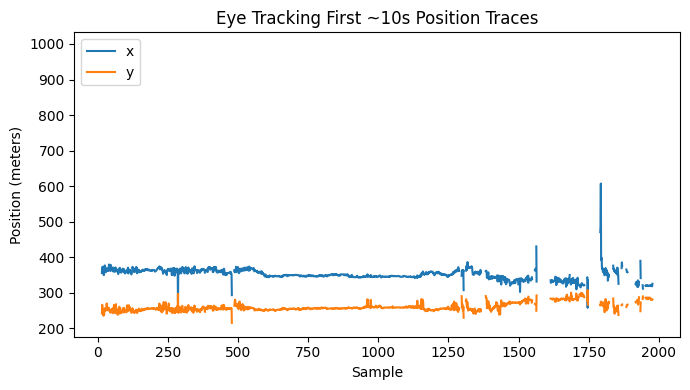

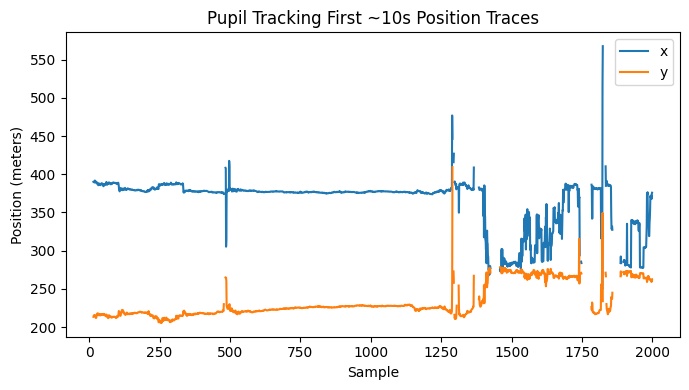

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Eye tracking - position traces
et = nwb.acquisition["EyeTracking"]

def plot_eye_series(series, label):
    data = series.data[:2000]  # (N, 2)
    # Use sample index as x-axis (for speed); timestamps could be shown if desired
    t = np.arange(data.shape[0])
    plt.figure(figsize=(7, 4))
    plt.plot(t, data[:,0], label="x")
    plt.plot(t, data[:,1], label="y")
    plt.xlabel("Sample")
    plt.ylabel("Position (meters)")
    plt.title(f"{label} First ~10s Position Traces")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_eye_series(et.spatial_series["eye_tracking"], "Eye Tracking")
plot_eye_series(et.spatial_series["pupil_tracking"], "Pupil Tracking")

### Likely blink events

The likely blink time series (boolean values) is also provided. We'll plot the first ~10 seconds of blink events, again using sample index for x-axis.

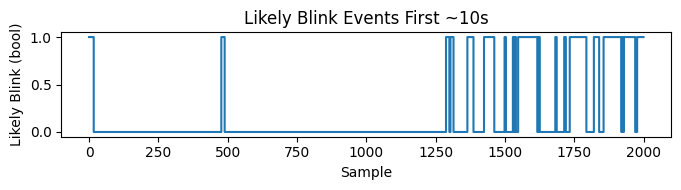

In [4]:
def plot_blink(blink_series):
    data = np.array(blink_series.data[:2000])  # Binary (0/1)
    t = np.arange(data.shape[0])
    plt.figure(figsize=(7, 2))
    plt.plot(t, data, drawstyle="steps-post")
    plt.xlabel("Sample")
    plt.ylabel("Likely Blink (bool)")
    plt.title("Likely Blink Events First ~10s")
    plt.tight_layout()
    plt.show()

if hasattr(et, "likely_blink"):
    plot_blink(et.likely_blink)

## Running wheel data visualization

The running wheel data is available both as raw rotation and as processed running speed (in a processing module). We'll plot both for the first ~10 seconds.

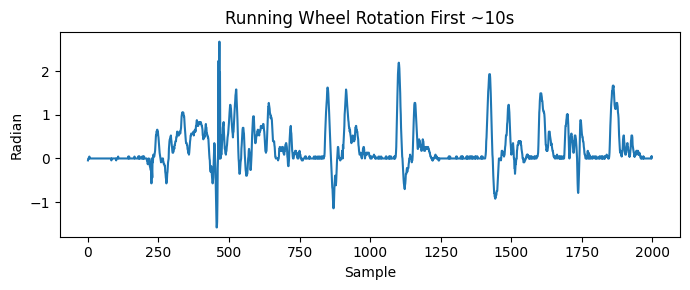

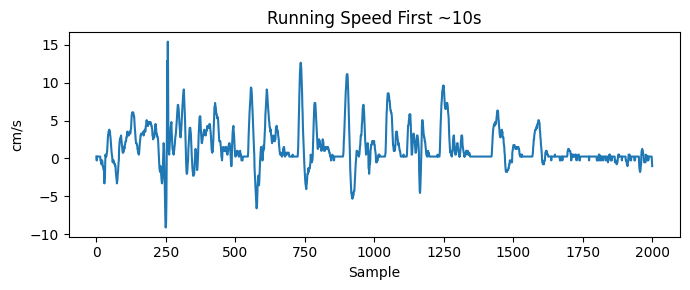

In [5]:
# Raw running wheel rotation
wheel_rot = nwb.acquisition["raw_running_wheel_rotation"]
rot_data = wheel_rot.data[:2000]
t_rot = np.arange(rot_data.shape[0])
plt.figure(figsize=(7,3))
plt.plot(t_rot, rot_data)
plt.xlabel("Sample")
plt.ylabel("Radian")
plt.title("Running Wheel Rotation First ~10s")
plt.tight_layout()
plt.show()

# Running speed (cm/s)
running = nwb.processing["running"]
speed = running.data_interfaces["running_speed"]
speed_data = speed.data[:2000]
t_speed = np.arange(speed_data.shape[0])
plt.figure(figsize=(7,3))
plt.plot(t_speed, speed_data)
plt.xlabel("Sample")
plt.ylabel("cm/s")
plt.title("Running Speed First ~10s")
plt.tight_layout()
plt.show()

## Visualizing neural data: spike times and waveforms for selected units

Let's access the `units` table. We'll load the spike times for up to 3 units (from the table) and plot raster plots for a short time window, plus overlay their mean waveforms if available.

Preview of first 2 unit IDs: [12 13]


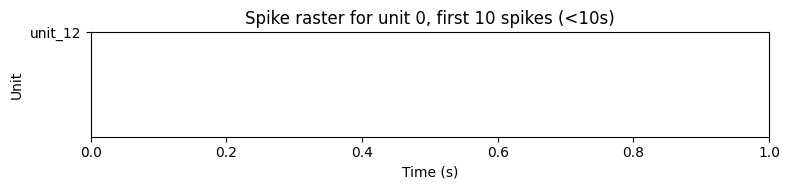

In [6]:
import pandas as pd

# Preview only first 2 unit ids to avoid slowdowns
units = nwb.units
try:
    unit_ids_preview = np.array(units.id[:2]) if hasattr(units, "id") else np.arange(2)
    print("Preview of first 2 unit IDs:", unit_ids_preview)
except Exception:
    print("Could not preview unit IDs.")

# Raster plot for spike times of unit 0 over first 10 seconds (limit to first 10 spikes)
try:
    plt.figure(figsize=(8, 2))
    unit_id = units.id[0] if hasattr(units, "id") else 0
    spike_times = np.array(units['spike_times'][unit_id])[:10]
    spike_times_seg = spike_times[spike_times < 10]
    plt.vlines(spike_times_seg, 0.6, 1.4)
    plt.yticks([1], [f"unit_{unit_id}"])
    plt.xlabel("Time (s)")
    plt.ylabel("Unit")
    plt.title("Spike raster for unit 0, first 10 spikes (<10s)")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not plot spike raster: {e}")

# Skip mean waveform for speed and robustness

## Visualizing LFP data for a single channel

The NWB structure contains LFP under acquisition or a processing group, nested under probe groups. Here, we'll demonstrate how to access and plot a brief segment (1 second, ~1250 samples) from one LFP channel in probeA.

In [7]:
# Find an LFP interface for probeA
try:
    eg = nwb.electrode_groups["probeA"]
    # Try the first available LFP interface under acquisition (structure may vary); if not available, skip
    acq_keys = list(nwb.acquisition.keys())
    lfp_candidates = [k for k in acq_keys if "lfp" in k.lower()]
    for k in lfp_candidates:
        lfp = nwb.acquisition[k]
        data = lfp.data
        n_samp = min(1250, data.shape[0])
        plt.figure(figsize=(10, 3))
        plt.plot(np.arange(n_samp) / eg.lfp_sampling_rate, np.array(data[:n_samp]))
        plt.xlabel("Time (s)")
        plt.ylabel("LFP (unknown units)")
        plt.title(f"LFP (first channel of {k}) ~1 second for probeA")
        plt.tight_layout()
        plt.show()
        break
    else:
        print("No LFP acquisition with a recognized key found.")
except Exception as e:
    print("Could not access or plot LFP:", e)

No LFP acquisition with a recognized key found.


## Exploring stimulus intervals and relating behavioral data to blocks

Stimulus interval tables annotate when specific stimuli were presented. We'll list available tables and, if possible, plot running speed aligned to blocks of a selected stimulus.

In [8]:
# List available interval table keys, but skip table loading for speed
try:
    stim_int_keys = [k for k in nwb.intervals.keys() if "presentations" in k]
    print("Stimulus interval tables (keys only):", stim_int_keys)
except Exception as e:
    print("Could not get stimulus interval table keys:", e)

Stimulus interval tables (keys only): ['Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations', 'SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations', 'SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations', 'SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations', 'SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations', 'UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations', 'curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations', 'natmovie_CricketsOnARock_540x960Full_584x460Active_presentations', 'natmovie_EagleSwooping1_540x960Full_584x460Active_presentations', 'natmovie_EagleSwooping2_540x960Full_584x460Active_presentations', 'natmovie_SnakeOnARoad_540x960Full_584

## Advanced exploration: Correlating running speed and pupil position

As an example integrative analysis, let's compute and visualize the correlation between running speed and the y-axis pupil position across the first 10 seconds.
Note: This is purely illustrative—deeper analyses would require more context and quality control.

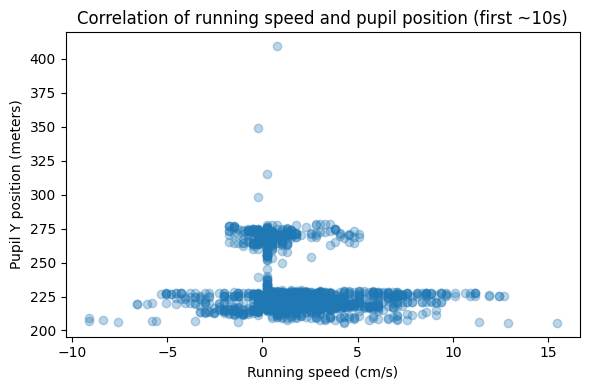

Sample correlation coefficient (Pearson): nan


In [9]:
try:
    pupil_y = et.spatial_series["pupil_tracking"].data[:2000, 1]
    avg_speed = speed.data[:2000]
    # Downsample to match if necessary (here, just ensuring lengths match)
    min_len = min(len(pupil_y), len(avg_speed))
    pupil_y = np.array(pupil_y[:min_len])
    avg_speed = np.array(avg_speed[:min_len])
    plt.figure(figsize=(6, 4))
    plt.scatter(avg_speed, pupil_y, alpha=0.3)
    plt.xlabel("Running speed (cm/s)")
    plt.ylabel("Pupil Y position (meters)")
    plt.title("Correlation of running speed and pupil position (first ~10s)")
    plt.tight_layout()
    plt.show()
    print("Sample correlation coefficient (Pearson):", np.corrcoef(avg_speed, pupil_y)[0, 1])
except Exception as e:
    print("Could not compute or plot correlation:", e)

## Summary and future directions

This notebook demonstrated:
- Programmatic access to a large, openly available neural and behavioral dataset (Dandiset 000690)
- Remote loading and inspection of NWB files using PyNWB and remfile
- Visualization of select behavioral traces (eye, pupil, running, blink events)
- Examples of exploring neural data (spike times, waveforms, LFP)
- How to align behavioral data to stimulus epochs and perform integrative exploratory analysis

**Future analysis directions:**
- Dive deeper into neural responses to different stimulus types or experimental epochs
- Quantify firing rate and LFP patterns for specific stimuli and compare across brain regions
- Implement further statistical, machine learning, or model-based explorations of the rich data in this Dandiset
- Compare and aggregate across sessions or subjects

For detailed exploration and new analyses, please consult the [DANDI Archive site](https://dandiarchive.org/dandiset/000690/0.250326.0015) and associated documentation.